In [1]:
%pip install openpyxl
import pandas as pd
df = pd.read_excel('Concrete_Data.xlsx',engine='openpyxl')

Note: you may need to restart the kernel to use updated packages.


In [2]:
df.head(10)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.029847
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.698299
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.447770
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.854291
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.289790


In [3]:
#check the size of the dataframe
num_rows, num_columns = df.shape

print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 1030
Number of columns: 9


In [4]:
#get the basic information of the dataframe
print (df.describe())

       Cement (component 1)(kg in a m^3 mixture)  \
count                                1030.000000   
mean                                  281.165631   
std                                   104.507142   
min                                   102.000000   
25%                                   192.375000   
50%                                   272.900000   
75%                                   350.000000   
max                                   540.000000   

       Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
count                                        1030.000000       
mean                                           73.895485       
std                                            86.279104       
min                                             0.000000       
25%                                             0.000000       
50%                                            22.000000       
75%                                           142.950000       
max                

In [5]:
new_column_names = ['Cement', 'Blast_Furnace_Slag', 'Fly_Ash', "Water", "Superplasticizer", "Coarse_Aggregate", "Fine_Aggregate", "Age", "Concrete_Strength"]
df_new = df
df_new.columns = new_column_names

### Plot1: Number of samples in different range of ages

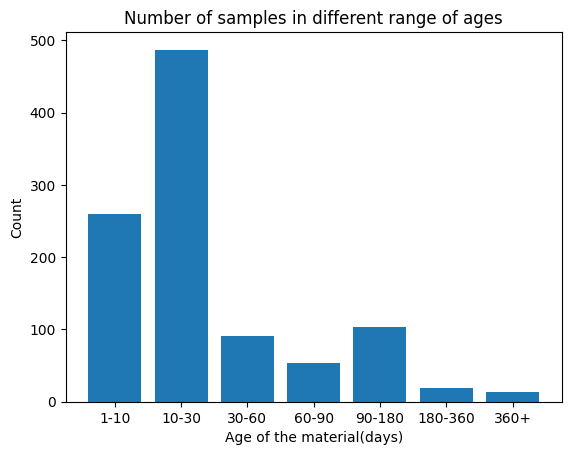

In [6]:
import matplotlib.pyplot as plt
bins = [1, 10, 30, 60, 90, 180, 360, float('inf')]
labels = ['1-10', '10-30', '30-60', '60-90', '90-180', '180-360', '360+']
df_new['Age_Count'] = pd.cut(df_new['Age'], bins=bins, labels=labels)
# Count the occurrences of each range
range_counts = df_new['Age_Count'].value_counts().sort_index()

# Plotting
plt.bar(range_counts.index, range_counts.values)
plt.xlabel('Age of the material(days)')
plt.ylabel('Count')
plt.title('Number of samples in different range of ages')
plt.show()

### Plot2: Number of samples in different range of strength

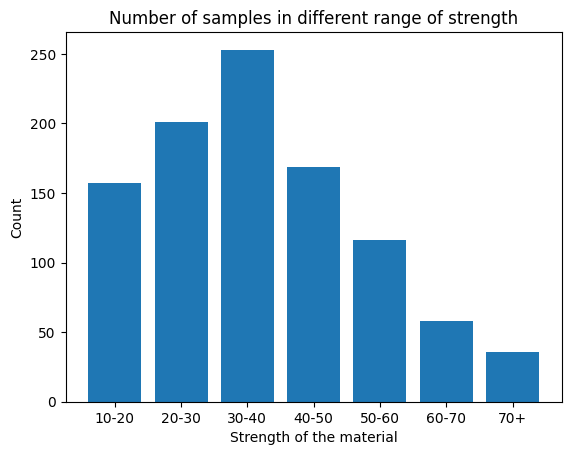

In [7]:
bins = [10, 20, 30, 40, 50, 60, 70, float('inf')]
labels = ['10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70+']
df_new['Strength_Count'] = pd.cut(df_new['Concrete_Strength'], bins=bins, labels=labels, right=False)
# Count the occurrences of each range
range_counts = df_new['Strength_Count'].value_counts().sort_index()

# Plotting
plt.bar(range_counts.index, range_counts.values)
plt.xlabel('Strength of the material')
plt.ylabel('Count')
plt.title('Number of samples in different range of strength')
plt.show()

### Plot3: Ratio of material use fly ash and superplasticizer

In [8]:
df_new

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Concrete_Strength,Age_Count,Strength_Count
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111,10-30,70+
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366,10-30,60-70
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535,180-360,40-50
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780,360+,40-50
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075,180-360,40-50
...,...,...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354,10-30,40-50
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794,10-30,30-40
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601,10-30,20-30
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036,10-30,30-40


In [9]:
ash_nonzero_sup_zero = ((df_new['Fly_Ash'] != 0) & (df_new['Superplasticizer'] == 0)).sum()
sup_nonzero_ash_zero = ((df_new['Superplasticizer'] != 0) & (df_new['Fly_Ash'] == 0)).sum()
both_zero = ((df_new['Fly_Ash'] == 0) & (df_new['Superplasticizer'] == 0)).sum()
both_nonzero = ((df_new['Fly_Ash'] != 0) & (df_new['Superplasticizer'] != 0)).sum()

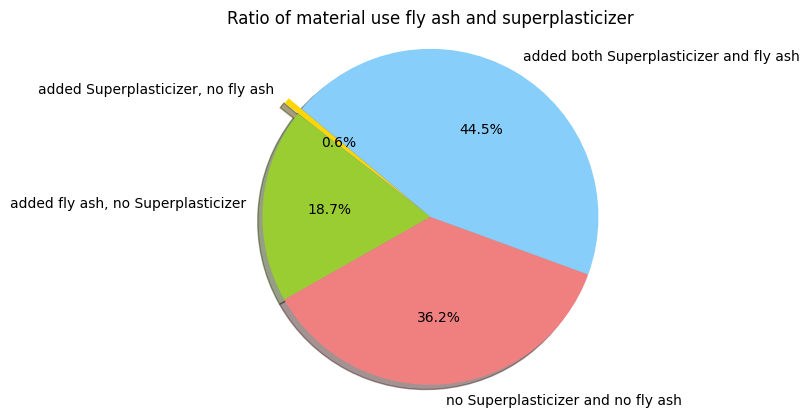

In [10]:
# Create a pie chart
labels = ['added Superplasticizer, no fly ash', 'added fly ash, no Superplasticizer', 'no Superplasticizer and no fly ash', 'added both Superplasticizer and fly ash']
sizes = [ash_nonzero_sup_zero, sup_nonzero_ash_zero, both_zero, both_nonzero]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0, 0)  # explode 1st slice

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title('Ratio of material use fly ash and superplasticizer')
plt.show()

### Plot4. Relationship between the amount of cement and concrete strength


In [11]:
df_s = df_new.drop('Age_Count',axis = 1).groupby("Strength_Count").mean()
df_s = df_s.reset_index(drop=False)

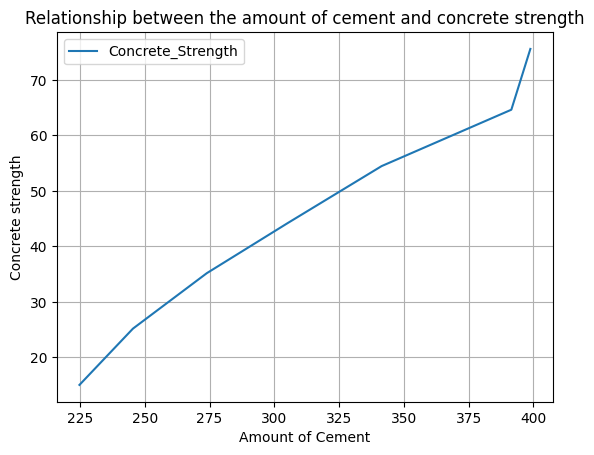

In [12]:
df_s.plot(x='Cement', y='Concrete_Strength', kind='line')

plt.ylabel('Concrete strength')
plt.xlabel('Amount of Cement')
plt.title('Relationship between the amount of cement and concrete strength')
plt.grid(True)
plt.show()

### Plot5. Relationship between the amount of water and concrete strength

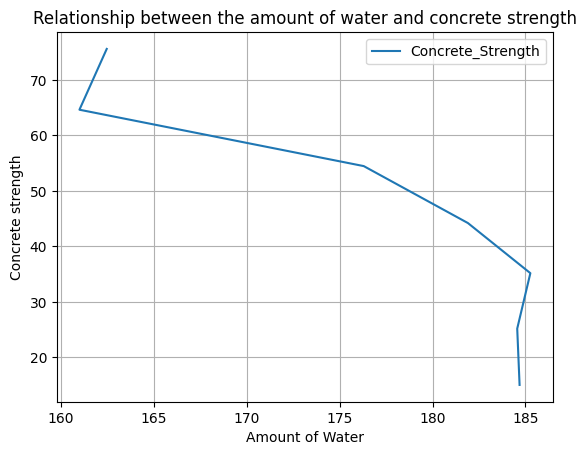

In [13]:
df_s.plot(x='Water', y='Concrete_Strength', kind='line')

plt.ylabel('Concrete strength')
plt.xlabel('Amount of Water')
plt.title('Relationship between the amount of water and concrete strength')
plt.grid(True)
plt.show()

### Plot6. Relationship between the amount of coarse aggregate and concrete strength

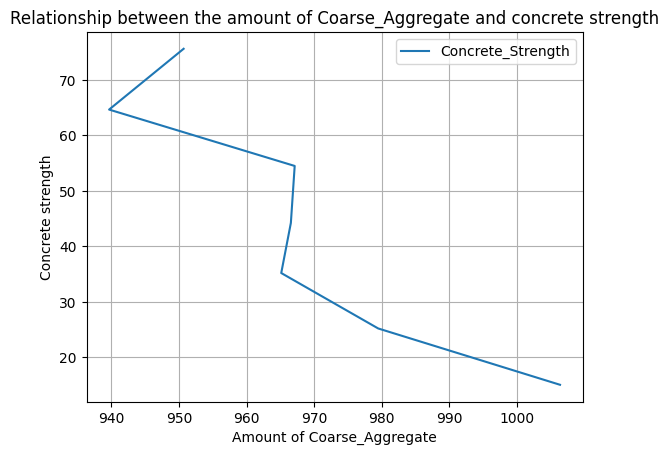

In [44]:
df_s.plot(x='Coarse_Aggregate', y='Concrete_Strength', kind='line')

plt.ylabel('Concrete strength')
plt.xlabel('Amount of Coarse_Aggregate')
plt.title('Relationship between the amount of Coarse_Aggregate and concrete strength')
plt.grid(True)
plt.show()

## Question3

### Change the columns name to more readable form

In [23]:
df_predict = pd.read_excel('Concrete_Data.xlsx',engine='openpyxl')

new_column_names = ['Cement', 'Blast_Furnace_Slag', 'Fly_Ash', "Water", "Superplasticizer", "Coarse_Aggregate", "Fine_Aggregate", "Age", "Concrete_Strength"]
df_predict.columns = new_column_names

### Fill all NAN values with average values

In [24]:
# Replace NaN values with the average of their respective columns
df_predict.fillna(df_predict.mean(), inplace=True)

#### Removing Duplicates

In [25]:
# Remove duplicates
df_predict = df_predict.drop_duplicates()

### Apply standardization to the dataset

In [26]:
from sklearn.preprocessing import StandardScaler

# Standardize the dataset
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_predict)

# Convert the scaled data array back to a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=df_predict.columns)

print("Original DataFrame:")
print(df_predict.head(5))
print("\nStandardized DataFrame:")
print(scaled_df.head(5))

Original DataFrame:
   Cement  Blast_Furnace_Slag  Fly_Ash  Water  Superplasticizer  \
0   540.0                 0.0      0.0  162.0               2.5   
1   540.0                 0.0      0.0  162.0               2.5   
2   332.5               142.5      0.0  228.0               0.0   
3   332.5               142.5      0.0  228.0               0.0   
4   198.6               132.4      0.0  192.0               0.0   

   Coarse_Aggregate  Fine_Aggregate  Age  Concrete_Strength  
0            1040.0           676.0   28          79.986111  
1            1055.0           676.0   28          61.887366  
2             932.0           594.0  270          40.269535  
3             932.0           594.0  365          41.052780  
4             978.4           825.5  360          44.296075  

Standardized DataFrame:
     Cement  Blast_Furnace_Slag   Fly_Ash     Water  Superplasticizer  \
0  2.506120           -0.836469 -0.865363 -0.941128         -0.596903   
1  2.506120           -0.836469 -0

### Train-Test Split

In [31]:
from sklearn.model_selection import train_test_split

y = scaled_df['Concrete_Strength']
X = scaled_df.drop(columns = 'Concrete_Strength')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train:")
print(X_train)
print("\nX_test:")
print(X_test)
print("\ny_train:")
print(y_train)
print("\ny_test:")
print(y_test)


X_train:
       Cement  Blast_Furnace_Slag   Fly_Ash     Water  Superplasticizer  \
78   2.422701           -0.836469 -0.865363 -1.888146          3.746798   
29   1.882876           -0.836469 -0.865363  2.153088         -1.019442   
280 -0.015141           -0.836469  0.652195 -1.006763          0.980012   
507  1.508930           -0.836469 -0.865363  1.684267         -1.019442   
652 -1.072258            2.068521 -0.865363  1.004477         -1.019442   
..        ...                 ...       ...       ...               ...   
106  0.568311            1.357948 -0.865363 -0.336350          0.586206   
270 -1.052314           -0.346267  1.070735 -1.113185          0.810997   
860 -1.204577            0.847078  0.895434 -0.191015          0.332682   
435 -1.089517            0.655502  1.193055 -0.328849          0.346204   
102  0.073552            1.496115 -0.865363 -1.752188          0.873532   

     Coarse_Aggregate  Fine_Aggregate       Age  
78          -1.576928        1.507018 -0

## Question4

### Machine learning model1: Decision Tree Regressor

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
# Train Decision Tree Regressor model
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)


# Make predictions
dt_pred = dt_model.predict(X_test)

# Calculate RMSE
dt_rmse = mean_squared_error(y_test, dt_pred, squared=False)

# Calculate MSE
dt_mse = mean_squared_error(y_test, dt_pred)

# Calculate MAE
dt_mae = mean_absolute_error(y_test, dt_pred)

# Display MSE and MAE values
print(f"Decision Tree MSE: {dt_mse:.2f}")
print(f"\nDecision Tree RMSE: {dt_rmse:.2f}")
print(f"\nDecision Tree MAE: {dt_mae:.2f}")

Decision Tree MSE: 0.15

Decision Tree RMSE: 0.39

Decision Tree MAE: 0.24


### Machine learning model2: Random Forest Regressor

In [43]:
# Train Random Forest Regressor model
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Make predictions
rf_pred = rf_model.predict(X_test)

# Calculate RMSE
rf_rmse = mean_squared_error(y_test, rf_pred, squared=False)

# Calculate MSE
rf_mse = mean_squared_error(y_test, rf_pred)

# Calculate MAE
rf_mae = mean_absolute_error(y_test, rf_pred)


# Display MSE, RMSE and MAE values
print(f"Random Forest MSE: {rf_mse:.2f}")
print(f"\nRandom Forest RMSE: {rf_rmse:.2f}")
print(f"\nRandom Forest MAE: {rf_mae:.2f}")

Random Forest MSE: 0.10

Random Forest RMSE: 0.32

Random Forest MAE: 0.21
